In [1]:
# Single LSTM with one hidden Dense Layer

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import ConvLSTM2D

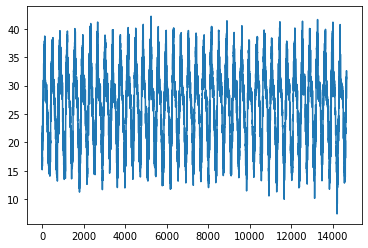

In [3]:
# load the dataset
dataframe = read_csv('DATA_TEMP_DATE_JA_RNN.csv', usecols=[1])
plt.plot(dataframe)


In [4]:
#Convert pandas dataframe to numpy array
dataset = dataframe.values
dataset = dataset.astype('float32') #COnvert values to float


In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]



In [7]:

def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)
    

seq_size = 10  # Number of time steps to look back 
#Larger sequences (look further back) may improve forecasting.

trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)



print("Shape of training set: {}".format(trainX.shape))
print("Shape of test set: {}".format(testX.shape))


Shape of training set: (11724, 10)
Shape of test set: (2923, 10)


In [8]:
# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print('Single LSTM with hidden Dense...')
model = Sequential()
model.add(LSTM(64, input_shape=(None, seq_size)))
model.add(Dense(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
print('Train...')

Single LSTM with hidden Dense...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                19200     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21,313
Trainable params: 21,313
Non-trainable params: 0
_________________________________________________________________
Train...


2021-11-14 22:31:10.297481: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-14 22:31:10.304586: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2021-11-14 22:31:10.304770: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2021-11-14 22:31:10.304938: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2021-11-14 22:31:10.305125: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could no

In [9]:
model.fit(trainX, trainY, validation_data=(testX, testY),
          verbose=2, epochs=100)


Epoch 1/100
367/367 - 2s - loss: 0.0062 - val_loss: 0.0017 - 2s/epoch - 5ms/step
Epoch 2/100
367/367 - 1s - loss: 0.0014 - val_loss: 0.0014 - 507ms/epoch - 1ms/step
Epoch 3/100
367/367 - 1s - loss: 0.0013 - val_loss: 0.0012 - 502ms/epoch - 1ms/step
Epoch 4/100
367/367 - 0s - loss: 0.0012 - val_loss: 0.0011 - 481ms/epoch - 1ms/step
Epoch 5/100
367/367 - 0s - loss: 0.0011 - val_loss: 0.0011 - 452ms/epoch - 1ms/step
Epoch 6/100
367/367 - 0s - loss: 0.0011 - val_loss: 0.0013 - 458ms/epoch - 1ms/step
Epoch 7/100
367/367 - 1s - loss: 0.0011 - val_loss: 0.0010 - 551ms/epoch - 2ms/step
Epoch 8/100
367/367 - 1s - loss: 0.0011 - val_loss: 0.0014 - 509ms/epoch - 1ms/step
Epoch 9/100
367/367 - 1s - loss: 0.0011 - val_loss: 0.0010 - 547ms/epoch - 1ms/step
Epoch 10/100
367/367 - 1s - loss: 0.0011 - val_loss: 0.0012 - 522ms/epoch - 1ms/step
Epoch 11/100
367/367 - 0s - loss: 0.0010 - val_loss: 0.0015 - 467ms/epoch - 1ms/step
Epoch 12/100
367/367 - 1s - loss: 0.0010 - val_loss: 0.0010 - 523ms/epoch - 1

Epoch 94/100
367/367 - 0s - loss: 9.7298e-04 - val_loss: 0.0010 - 444ms/epoch - 1ms/step
Epoch 95/100
367/367 - 0s - loss: 9.8254e-04 - val_loss: 9.8175e-04 - 438ms/epoch - 1ms/step
Epoch 96/100
367/367 - 1s - loss: 9.9220e-04 - val_loss: 0.0010 - 507ms/epoch - 1ms/step
Epoch 97/100
367/367 - 1s - loss: 9.8959e-04 - val_loss: 9.7277e-04 - 577ms/epoch - 2ms/step
Epoch 98/100
367/367 - 0s - loss: 9.6991e-04 - val_loss: 0.0011 - 488ms/epoch - 1ms/step
Epoch 99/100
367/367 - 1s - loss: 9.9106e-04 - val_loss: 0.0012 - 523ms/epoch - 1ms/step
Epoch 100/100
367/367 - 1s - loss: 9.8396e-04 - val_loss: 9.8242e-04 - 513ms/epoch - 1ms/step


In [10]:
# make predictions

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


In [11]:
# invert predictions back to prescaled values
#This is to compare with original input values
#SInce we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [12]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 1.07 RMSE
Test Score: 1.09 RMSE


In [13]:
# shift train predictions for plotting
#we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict


In [14]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict


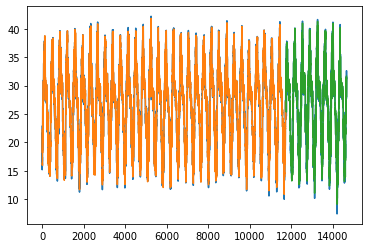

In [15]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [16]:
# Train Score: 1.07 RMSE
# Test Score: 1.09 RMSE